# Supervised Learning Project: Human Resource (HR) Analytics
The project was part of DataCamp course on HR Analytics using python

The aim of the project is to understand employee churn. 
One of the goal of the project is to find features which are clearly different in employee churn and employee not churn.
The analysis of dataset will equip the HR to understand the employee behaviour. 
The insights will help the HR to manage employee well and avoid churn.

In [1]:
# Necessary library for the project 
import pandas as pd
import numpy as np

# Data Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [30]:
# data load
data = pd.read_csv('churn.csv')
print(data.head())

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0          0.38        0.53                   2                   157   
1          0.80        0.86                   5                   262   
2          0.11        0.88                   7                   272   
3          0.72        0.87                   5                   223   
4          0.37        0.52                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low  


## Data Exploration
This section is dedicated to understand the dataset. Data analysis and visualization techniques are employed. The features from the two class are compared.    

* Percentage churn

In [3]:
n_employee = len(data)
print(data.churn.value_counts())
print(data.churn.value_counts()/n_employee*100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


23% employee churned. The dataset is imbalanced. The machine learning model require hyperparameter tuning.

#### Functions for data visualization

In [4]:
def categorical_column_plot(df, column_name):
    """
    make a pie chart for the categorical column
    make a bar chart of number of count values in each categories
    make a bar chart for the column indicating distribution of final predictor in each category
    
    Args:
    df (DataFrame): The DataFrame which had categorical column
    column_name (str): The name of the categorical column
    """
    
    fig, ax = plt.subplots(1,2, figsize=(20,8))
    df[column_name].value_counts().plot.pie(ax=ax[0], fontsize=14)
    
    
    sns.countplot(x=column_name, hue='churn', data=df, ax=ax[1])
    ax[1].set_title(f"Number of Employee by {column_name}", fontsize=16)
    ax[1].set_ylabel('count', fontsize=16)
    ax[1].set_xlabel(f'{column_name}', fontsize=16)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90, fontsize=12)


In [5]:
def numerical_column_plot(df, feat_col, target_col):
    """
    kde plot for numerical data with attrition
    box plot for numerical data with attrition
    """
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    sns.kdeplot(data=df, x=feat_col, hue=target_col, ax=ax[0], shade=True, color='palegreen', legend=True)
    
    sns.boxplot(y=feat_col, x=target_col, data=df,  ax=ax[1], showfliers=False)

In [6]:
def numerical_categorical_plot(df, num_feat_col, categorical_feat_col):
    """
    swarmplot between categorical and numerical column with attrition yes and no side by side    
    """
    fig, ax = plt.subplots(1,1, figsize=(6,6))
    sns.swarmplot(x=categorical_feat_col, y=numerical_feat_col, hue='Attrition', data=df, dodge=True)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Catgorical Data Visualization

* Department and Churn

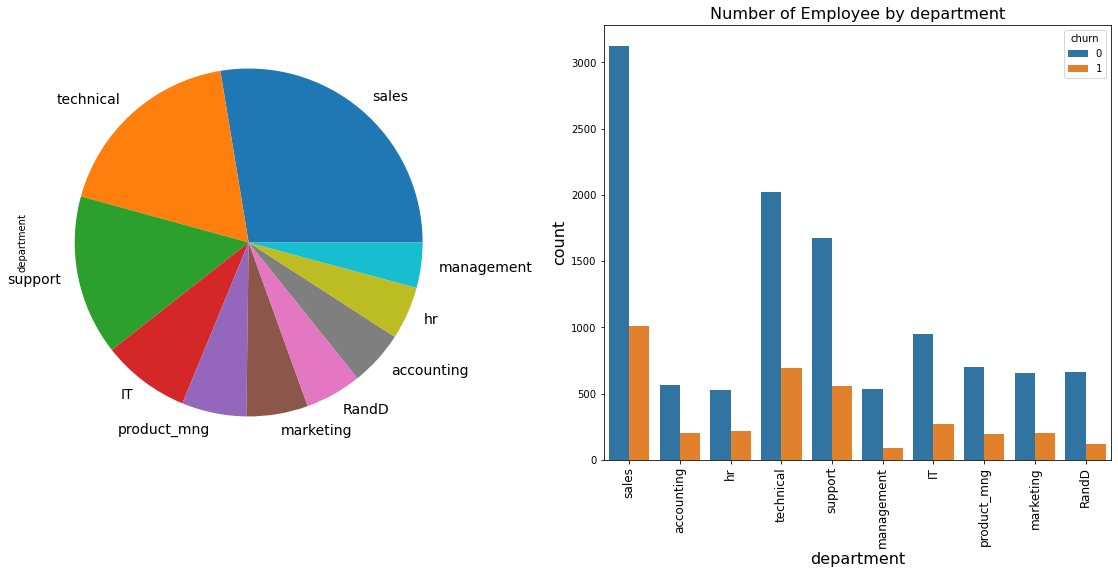

In [8]:
categorical_column_plot(df=data, column_name='department')

* Salary and Churn

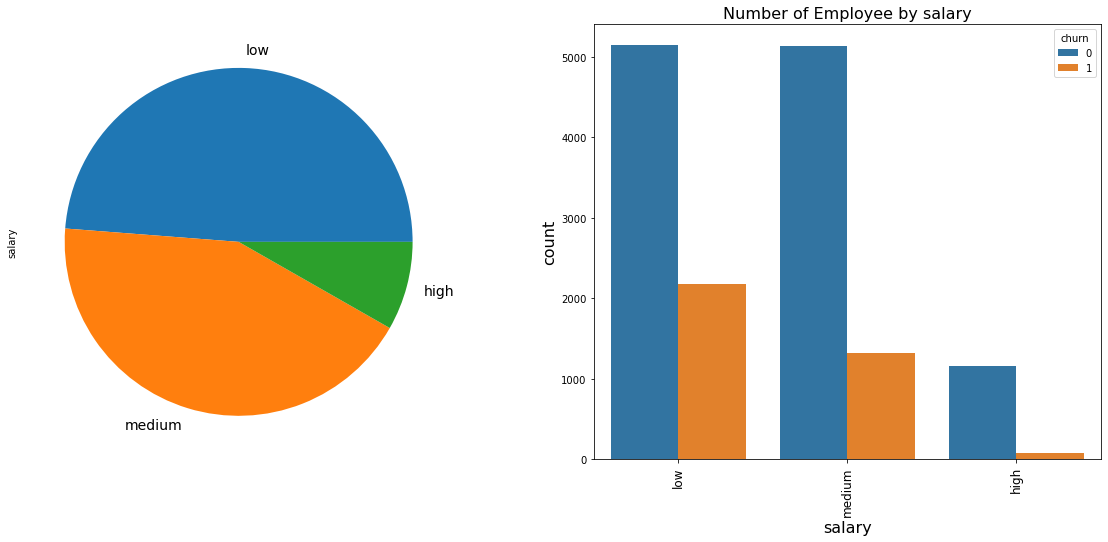

In [9]:
categorical_column_plot(df=data, column_name='salary')

1. Employees with low salary comparatively churn more  

### Numerical Data Visualization

* Average Monthly Hours spend in company

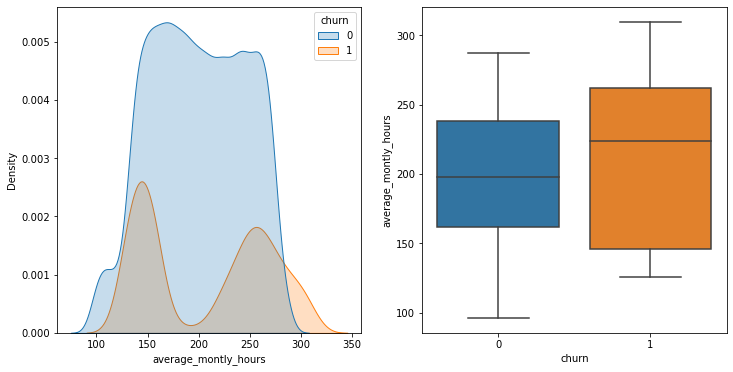

In [10]:
numerical_column_plot(df=data, feat_col='average_montly_hours', target_col='churn')

1. Employee churned who spend more monthly hours at work

* Time Spend in Company daily

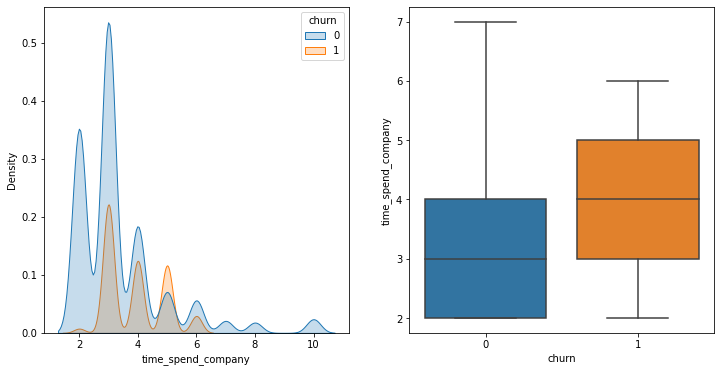

In [11]:
numerical_column_plot(df=data, feat_col='time_spend_company', target_col='churn')

1. Employees churns who had spend more time in the company 

* Satisfaction level in churn and non-churn employee

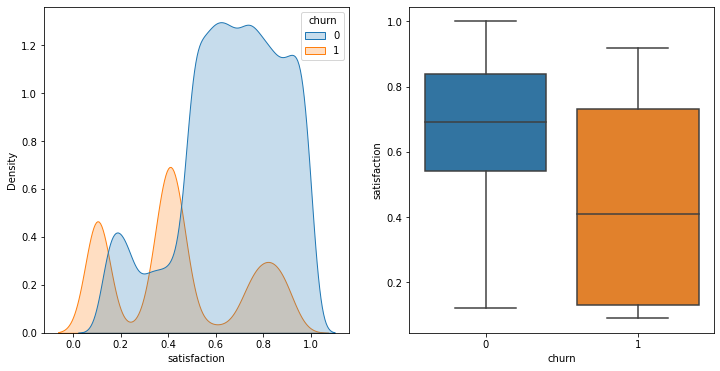

In [12]:
numerical_column_plot(df=data, feat_col='satisfaction', target_col='churn')

1. Satisfaction level of non-churn employee is higher

* Internal performance evaluation score of employee

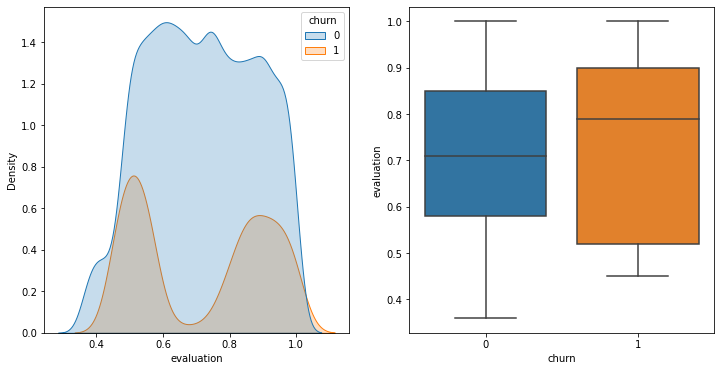

In [13]:
numerical_column_plot(df=data, feat_col='evaluation', target_col='churn')

1. Churned employees scored higher in evalaution and have high variation in score

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* Number of project and churn

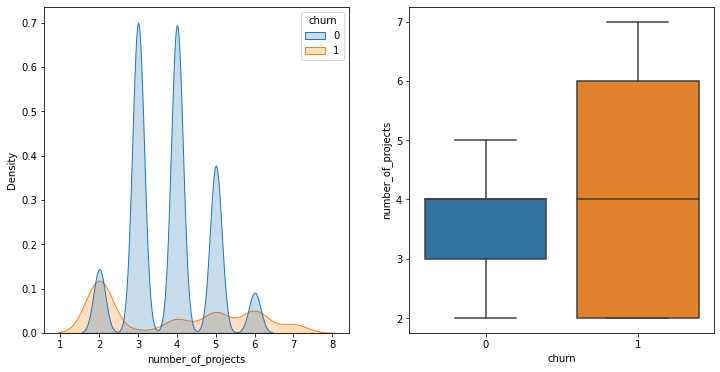

In [15]:
numerical_column_plot(df=data, feat_col='number_of_projects', target_col='churn') 

1. Non churner have project in the range of 3 to 4
2. Churn employee have high variation 
3. Some churned employee had around two projects and other have above 4

* Promotion and churn

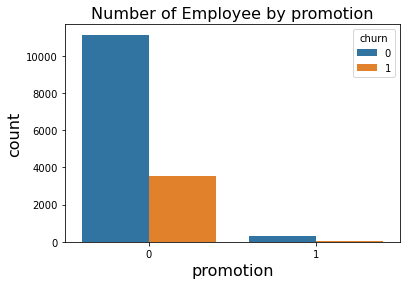

In [16]:
column_name = 'promotion'
ax = sns.countplot(x=column_name, hue='churn', data=data)
ax.set_title(f"Number of Employee by {column_name}", fontsize=16)
ax.set_ylabel('count', fontsize=16)
ax.set_xlabel(f'{column_name}', fontsize=16)
plt.show()

* Work Accident and churn

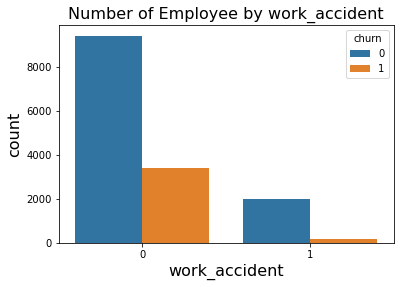

In [17]:
column_name = 'work_accident'
ax = sns.countplot(x=column_name, hue='churn', data=data)
ax.set_title(f"Number of Employee by {column_name}", fontsize=16)
ax.set_ylabel('count', fontsize=16)
ax.set_xlabel(f'{column_name}', fontsize=16)
plt.show()

1. Employee who didn't get promotion churn
2. Employee who had accident at work churn

## Data Preprocessing
In this section we'll prepare the data for the classification stage. It is integral part of machine learning model. 
Ordinal and categorical features are converted into numerical values.

We will use Decison tree classifier therefore numerical value require no scaling

* Salary is ordinal 
1. We will convert it as ordered codes

In [18]:
print(data.salary.unique())


['low' 'medium' 'high']


In [19]:
data.salary = data.salary.astype('category')
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])
data.salary = data.salary.cat.codes
print(data.salary.unique())

[0 1 2]


* Department is non ordinal 
1. We will use one hot encoding
2. Drop one feature encoding to avoid redundancy

In [20]:
print(data.department.unique())
departments = pd.get_dummies(data.department)
print(departments.head(2))

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  


In [21]:
departments.drop('accounting', axis=1, inplace=True)

* Update features in original data

In [22]:
data=data.drop('department', axis=1)
data = data.join(departments)

* correlation between churn and satisfaction

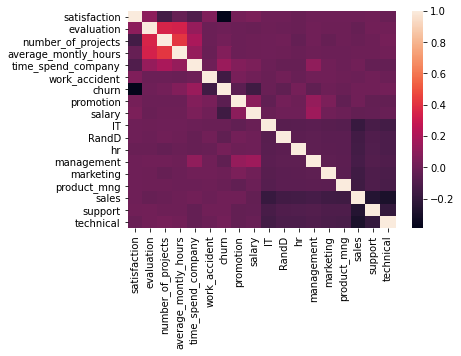

In [23]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

## Decison Tree Model for Classification

In [24]:
y = data.churn
X = data.drop('churn',axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [26]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model performance

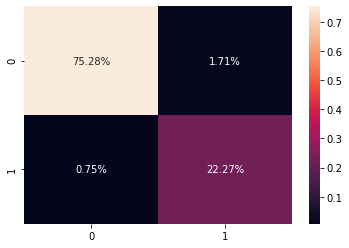

In [28]:
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
#print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.show()

In [29]:
print('accuracy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))


accuracy:  0.9754666666666667
precision:  0.92880978865406
recall:  0.9675550405561993
